<a href="https://colab.research.google.com/github/code-with-shannu/Pytorch/blob/main/Basic_neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps:
 1. model
 2. load data
 3.

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd  # used to analyze big data and make conclusions based on statistical methods
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#create a model class that inherits nn.Module
class Model(nn.Module):
  # Input layer has four features.Since we are using iris dataset equates to iris flower
  # Input layer(4 features)-->Hidden layer1(number of neurons)-->hidden layer2(number of neurons)-->output layer(3 classes of flowers)
  # 3 classes of iris flowers are iris Setosa,iris veriscolor,iris virgnica

  def __init__(self,in_features=4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()  #instantiates nn.module
    self.fc1 = nn.Linear(in_features,h1)#fc1 is full connected from in_features to h1 layer
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)
    #now the model or the structure of neural network was created

    #Now we have to move forward
  def feed_forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x




In [28]:
torch.manual_seed(42)
model = Model()


# Load Data

In [16]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [17]:
#modify data
#change last column from strings to float
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Training Data:
Separate input and output

In [36]:
X = my_df.drop('variety',axis = 'columns')
y = my_df['variety']
#print(X)
#print(y)
# now we have to convert this to numpy arrays
X = X.values
y = y.values
# print(X)
# print(y)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 41)#20% of data is treated as test data and the remaining as the training data
#convert to Float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
#print(y_train)


In [47]:
# Set the criterion of the model to measure the error how far off are the predictions from our expected output

criterion = nn.CrossEntropyLoss()
#choose an optimizer eg Adam, learning rate
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)# fc1,fc2,out  are going as model parameters



In [39]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

# Train the model

In [49]:
epochs = 100
losses = []
for i in range(epochs):
  #Go forward and give predictions
  y_pred = model.feed_forward(X_train)#get the predicted results

  #measure the error or loss
  loss = criterion(y_pred,y_train)

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10==0:
    print(f'Epoch:{i},loss:{loss}')


  #do some backpropagation and find the error rate of the forward propagation and feed it backward through the back propagation to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch:0,loss:1.0935293436050415
Epoch:10,loss:0.9156933426856995
Epoch:20,loss:0.7563302516937256
Epoch:30,loss:0.6106743216514587
Epoch:40,loss:0.4407137632369995
Epoch:50,loss:0.2712990641593933
Epoch:60,loss:0.15888482332229614
Epoch:70,loss:0.09664525091648102
Epoch:80,loss:0.0672047957777977
Epoch:90,loss:0.052712492644786835


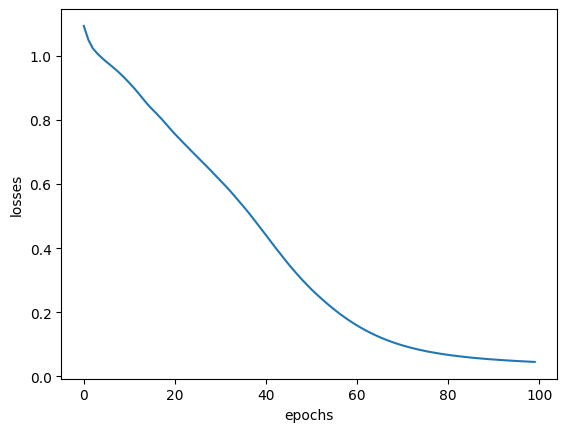

In [50]:
plt.plot(range(epochs),losses)
plt.ylabel("losses")
plt.xlabel('epochs')
plt.show()

In [52]:
# Evaluate our model on test  data set and validate it
with torch.no_grad():  #it turns off the back propagation
  y_eval = model.feed_forward(X_test)
  loss = criterion(y_eval,y_test)
